# Forecasting Assignment

## Dataset - Airlines+Data

## Objective:-We want predict Passenger ticket sales

#### Importing the important libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Load the dataset and understand it

In [2]:
data=pd.read_excel('Airlines+Data.xlsx')
data 

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# Performing the basic EDA analysis on the data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

# performing the basic visualization of the forecasting

In [6]:
data_vis=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

<AxesSubplot:xlabel='Month'>

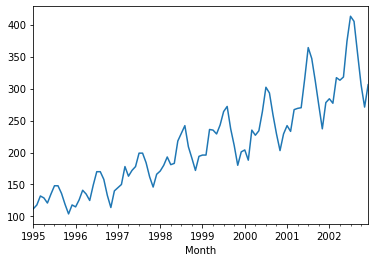

In [7]:
data_vis.plot()

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

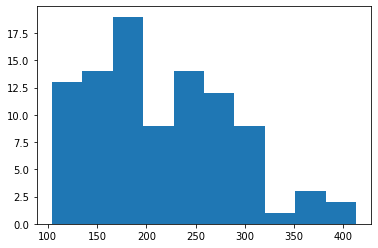

In [8]:
plt.hist(data_vis)

<AxesSubplot:ylabel='Density'>

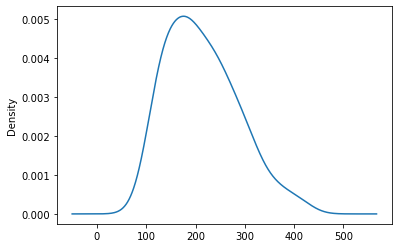

In [9]:
data_vis.plot(kind='kde')

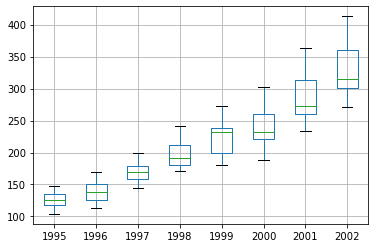

In [10]:
group=data_vis.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

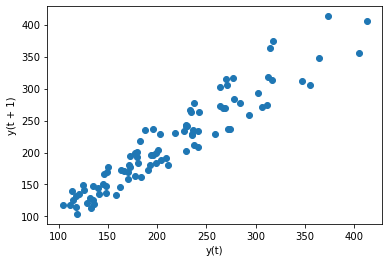

In [11]:
lag_plot(data_vis)

# performing the data driven methods on the dataset

In [12]:
train=data.head(80)# spliting the data into train and test
test=data.tail(16)

# moving average  and time decomposition plot  

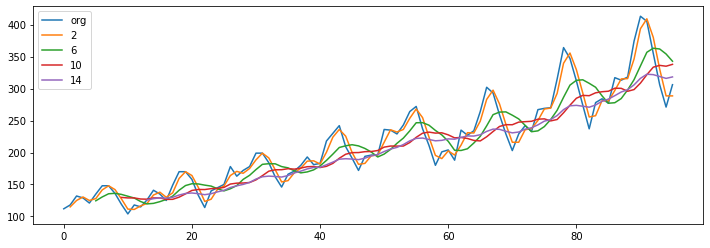

In [13]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label='org')
for i in range(2,18,4):
    data['Passengers'].rolling(i).mean().plot(label=(str(i)))
plt.legend(loc='best')

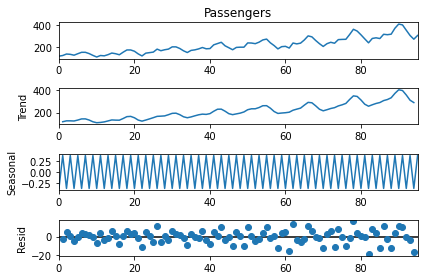

In [14]:
time_plot=seasonal_decompose(data.Passengers,freq=2)
time_plot.plot()
plt.show()

# creating my metric MAPE inorder to find the model performance

In [15]:
def Mape(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

# developing the model of simple exponential  

In [16]:
train['Passengers']=train['Passengers'].astype('double')
sem_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)

In [17]:
pred_sem=sem_model.predict(start=test.index[0],end=test.index[-1])
pred_sem

80    297.434175
81    297.434175
82    297.434175
83    297.434175
84    297.434175
85    297.434175
86    297.434175
87    297.434175
88    297.434175
89    297.434175
90    297.434175
91    297.434175
92    297.434175
93    297.434175
94    297.434175
95    297.434175
dtype: float64

In [18]:
sem_mape=Mape(pred_sem,test.Passengers)
sem_mape

11.375850554268187

# developing the holt method 

In [19]:
holt_method=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)

In [20]:
holt_pred=holt_method.predict(start=test.index[0],end=test.index[-1])
holt_pred

80    366.386458
81    380.542978
82    394.699497
83    408.856016
84    423.012535
85    437.169055
86    451.325574
87    465.482093
88    479.638612
89    493.795132
90    507.951651
91    522.108170
92    536.264689
93    550.421208
94    564.577728
95    578.734247
dtype: float64

In [21]:
holt_mape=Mape(holt_pred,test.Passengers)
holt_mape

51.93443984363048

# holt  winter exponential smoothing with additive seasonality and additive trend

In [22]:
holt_win_model = ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()

In [23]:
holt_win_model_pred=holt_win_model.predict(start=test.index[0],end=test.index[-1])
holt_win_model_pred

80    323.501021
81    300.501801
82    279.502650
83    301.003947
84    305.172327
85    306.029940
86    333.316531
87    327.174339
88    326.459910
89    350.459213
90    375.458864
91    374.602306
92    351.103327
93    328.104106
94    307.104956
95    328.606253
dtype: float64

In [24]:
holt_win_model_mape=Mape(holt_win_model_pred,test['Passengers'])
holt_win_model_mape

7.6099745542819575

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [25]:
holt_win_model2 = ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [26]:
holt_win_model2_pred=holt_win_model2.predict(start=test.index[0],end=test.index[-1])
holt_win_model2_pred

80    310.168225
81    273.379578
82    239.340177
83    270.784249
84    276.723737
85    274.061717
86    317.646102
87    307.800973
88    306.489927
89    343.885684
90    384.071596
91    379.433827
92    336.667199
93    296.570436
94    259.500944
95    293.434704
dtype: float64

In [27]:
holt_win_model2_mape=Mape(holt_win_model2_pred,test['Passengers'])
holt_win_model2_mape

3.2167504981916455

# from the above model we are using the holts winter exponential smoothing with multiplicative seasonality and additive trend because it has given the lowest value of the Mape  and applying on the entire data set

In [28]:
data['Passengers']=data['Passengers'].astype('double')

In [29]:
model=ExponentialSmoothing(data['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [30]:
model.forecast(5)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
dtype: float64